# VJM Modelling

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
def Rx(q):
    T = np.array([[1, 0, 0, 0],
                  [0, np.cos(q), -np.sin(q), 0],
                  [0, np.sin(q), np.cos(q), 0],
                  [0, 0, 0, 1]])
    return T


def dRx(q):
    T = np.array([[0, 0, 0, 0],
                  [0, -np.sin(q), -np.cos(q), 0],
                  [0, np.cos(q), -np.sin(q), 0],
                  [0, 0, 0, 0]])
    return T


def Ry(q):
    T = np.array([[np.cos(q), 0, np.sin(q), 0],
                  [0, 1, 0, 0],
                  [-np.sin(q), 0, np.cos(q), 0],
                  [0, 0, 0, 1]])
    return T


def dRy(q):
    T = np.array([[-np.sin(q), 0, np.cos(q), 0],
                  [0, 0, 0, 0],
                  [-np.cos(q), 0, -np.sin(q), 0],
                  [0, 0, 0, 0]])
    return T


def Rz(q):
    T = np.array([[np.cos(q), -np.sin(q), 0, 0],
                  [np.sin(q), np.cos(q), 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


def dRz(q):
    T = np.array([[-np.sin(q), -np.cos(q), 0, 0],
                  [np.cos(q), -np.sin(q), 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0]])
    return T


def Tx(x):
    T = np.array([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


def dTx():
    T = np.array([[0, 0, 0, 1],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0]])
    return T


def Ty(y):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T


def dTy():
    T = np.array([[0, 0, 0, 0],
                  [0, 0, 0, 1],
                  [0, 0, 0, 0],
                  [0, 0, 0, 0]])
    return T


def Tz(z):
    T = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]])
    return T


def dTz(z):
    T = np.array([[0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 0, 1],
                  [0, 0, 0, 0]])
    return T


def FK(q, thetas, links):
    T = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Rz(thetas[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Ry(thetas[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Ry(thetas[2]),
                             Tx(-links[3]),
                             Tz(links[4]),
                             Rx(q[3]),
                             Rx(thetas[3]),
                             Ry(q[4]),
                             Ry(thetas[4]),
                             Tz(links[5]),
                             Rx(q[5]),
                             Ry(thetas[5])])
    return T

In [ ]:
links_length = np.array([0.4, 0.5, 0.5, 0.2, 0.1, 0.1])
diameters = np.array([0.2, 0.05, 0.05, 0.01, 0.01, 0.01])
thetas = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [ ]:
def IK(pos, links, phi):
    x = pos[0]
    y = pos[1]
    z = pos[2]
    flag = 1 # elbow up and down

    q0 = np.arctan2(y,x)
    
    v = z - links[0]
    w = x*np.cos(q0) + y*np.sin(q0)

    q2 =  np.arccos(((z-links[0])**2 + (x*np.cos(q0)+y*np.sin(q0))**2-links[1]**2-links[2]**2)/(2*links[1]*links[2]))

    # print(q2)

    c = -links[2]*np.sin(q2)
    q1 = np.arctan2(v,w) + flag*np.arctan2(np.sqrt(v**2+w**2-c**2),c)

    q3 = 0.01 
    q4 = 0.01
    q5 = 0.01

    q = np.array([q0, q1, q2, q3, q4, q5])
    return q


In [ ]:
f = FK([np.pi, 1, 0.01, 0.01, 0.01, 0.01], thetas, links_length)

ik = IK([0.7, 0, 0, 0.1, 0.1, 0.1], links_length, 0)

 ## Stub

In [ ]:
# Stiffness parameters for links
# Aluminum
E = 6.9000e+10
G = 2.5500e+10

LinkDiameter = 0.15
A = np.pi * (LinkDiameter ** 2) / 4

Iy = np.pi * (LinkDiameter ** 4) / 64
Iz = np.pi * (LinkDiameter ** 4) / 64
Ip = Iy + Iz

def JacobianForTheta(q, thetas, links):
    T = FK(q, thetas, links)
    T[0:3, 3] = 0
    T_inv = np.transpose(T)

    dT = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             dRz(thetas[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Ry(thetas[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Ry(thetas[2]),
                             Tx(-links[3]),
                             Tz(links[4]),
                             Rx(q[3]),
                             Rx(thetas[3]),
                             Ry(q[4]),
                             Ry(thetas[4]),
                             Tz(links[5]),
                             Rx(q[5]),
                             Ry(thetas[5])])

    dT = np.linalg.multi_dot([dT, T_inv])
    J1 = np.vstack([dT[0, 3], dT[1, 3], dT[2, 3], dT[2, 1], dT[0, 2], dT[1, 0]])

    dT = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Rz(thetas[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             dRy(thetas[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Ry(thetas[2]),
                             Tx(-links[3]),
                             Tz(links[4]),
                             Rx(q[3]),
                             Rx(thetas[3]),
                             Ry(q[4]),
                             Ry(thetas[4]),
                             Tz(links[5]),
                             Rx(q[5]),
                             Ry(thetas[5])])

    dT = np.linalg.multi_dot([dT, T_inv])
    J2 = np.vstack([dT[0, 3], dT[1, 3], dT[2, 3], dT[2, 1], dT[0, 2], dT[1, 0]])

    dT = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Rz(thetas[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Ry(thetas[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             dRy(thetas[2]),
                             Tx(-links[3]),
                             Tz(links[4]),
                             Rx(q[3]),
                             Rx(thetas[3]),
                             Ry(q[4]),
                             Ry(thetas[4]),
                             Tz(links[5]),
                             Rx(q[5]),
                             Ry(thetas[5])])

    dT = np.linalg.multi_dot([dT, T_inv])
    J3 = np.vstack([dT[0, 3], dT[1, 3], dT[2, 3], dT[2, 1], dT[0, 2], dT[1, 0]])

    dT = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Rz(thetas[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Ry(thetas[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Ry(thetas[2]),
                             Tx(-links[3]),
                             Tz(links[4]),
                             Rx(q[3]),
                             dRx(thetas[3]),
                             Ry(q[4]),
                             Ry(thetas[4]),
                             Tz(links[5]),
                             Rx(q[5]),
                             Ry(thetas[5])])

    dT = np.linalg.multi_dot([dT, T_inv])
    J4 = np.vstack([dT[0, 3], dT[1, 3], dT[2, 3], dT[2, 1], dT[0, 2], dT[1, 0]])


    dT = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Rz(thetas[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Ry(thetas[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Ry(thetas[2]),
                             Tx(-links[3]),
                             Tz(links[4]),
                             Rx(q[3]),
                             Rx(thetas[3]),
                             Ry(q[4]),
                             dRy(thetas[4]),
                             Tz(links[5]),
                             Rx(q[5]),
                             Ry(thetas[5])])
    
    dT = np.linalg.multi_dot([dT, T_inv])
    J5 = np.vstack([dT[0, 3], dT[1, 3], dT[2, 3], dT[2, 1], dT[0, 2], dT[1, 0]])
    

    dT = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Rz(thetas[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Ry(thetas[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Ry(thetas[2]),
                             Tx(-links[3]),
                             Tz(links[4]),
                             Rx(q[3]),
                             Rx(thetas[3]),
                             Ry(q[4]),
                             Ry(thetas[4]),
                             Tz(links[5]),
                             Rx(q[5]),
                             dRy(thetas[5])])
    
    dT = np.linalg.multi_dot([dT, T_inv])
    J6 = np.vstack([dT[0, 3], dT[1, 3], dT[2, 3], dT[2, 1], dT[0, 2], dT[1, 0]])

    J = np.hstack([J1, J2, J3, J4, J5, J6])
    return J



# Geometric Calibration 

# Redundancy Resolution

## My Forward Kinematic

### Sympy Variables

In [ ]:
q0 , q1, q2, q3, q4, q5 = sp.symbols('q_0, q_1, q_2, q_3, q_4, q_5')
l0, l1, l2, l3, l4, l5 = sp.symbols('l_0, l_1, l_2, l_3, l_4, l_5')
qs = [q0, q1, q2, q3, q4, q5]
ls = [l0, l1, l2, l3, l4, l5]
vars = qs + ls
x, y, z = sp.symbols('x, y, z')
pi = sp.pi

### Transformation Matrices

In [ ]:
Rx = sp.Matrix([[1, 0, 0, 0],
               [0, sp.cos(q1), -sp.sin(q1), 0],
               [0, sp.sin(q1), sp.cos(q1), 0], 
                [0, 0, 0, 1]])
Ry = sp.Matrix([
                [sp.cos(q1), 0, sp.sin(q1), 0],
                [0, 1, 0, 0],
                [-sp.sin(q1), 0, sp.cos(q1), 0],
                [0, 0, 0, 1]])
Rz = sp.Matrix([[sp.cos(q1), -sp.sin(q1), 0, 0], 
               [sp.sin(q1), sp.cos(q1), 0, 0],
               [0, 0, 1, 0],
                [0, 0, 0, 1]])

Tx = sp.Matrix([
                [1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]]
  )
Ty = sp.Matrix([
                [1, 0, 0, 0],
                [0, 1, 0, y],
                [0, 0, 1, 0],
                [0, 0, 0, 1]]
  )
Tz = sp.Matrix([
                [1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, z],
                [0, 0, 0, 1]]
  )
def Transform(theta, alpha, d, a, axis='z'):
    if axis == 'x':
        Q = Tx.subs(x, d)
    elif axis == 'y':
        Q = Ty.subs(y, d)
    else:
        Q = Tz.subs(z, d)
    
    return Rx.subs(q1, alpha)@\
        Tx.subs(x, a)@\
        Rz.subs(q1, theta)@\
        Q



### Transformations

In [ ]:
T0_1 = Transform(q0, 0, l0, 0)
T1_2 = Transform(q1, pi/2, l1, 0, 'y')
T2_3 = Transform(q3, 0, l2, 0, 'y')
# T3_4 = Transform(q4, -pi/2, l3, 0)
# T4_5 = Transform(q5, pi/2, l4, 0)
# T5_6 = Transform(q5, -pi/2, l5, 0)
T3_4 = Transform(q4, -pi/2, 0, 0)
T4_5 = Transform(q5, pi/2, 0, 0)
T5_6 = Transform(q5, -pi/2, 0, 0)

T1_2

Matrix([
[cos(q_1), -sin(q_1),  0, -l_1*sin(q_1)],
[       0,         0, -1,             0],
[sin(q_1),  cos(q_1),  0,  l_1*cos(q_1)],
[       0,         0,  0,             1]])

In [ ]:
T0_6 = T0_1@T1_2@T2_3@T3_4@T4_5@T5_6
P = T0_6[:3, -1]
P = P.subs([(l3,0), (l4, 0), (l5, 0)])
p_lambda = sp.lambdify(vars, P, 'sympy')
r = p_lambda(0, 0, 0, 0, 0, 0, l0, l1, l2, l3, l4, l5)
T_lambda = sp.lambdify(vars, T0_6, 'numpy')
r

Matrix([
[              0],
[              0],
[l_0 + l_1 + l_2]])

### Euler Angles

In [ ]:
def euler_angles_sym(R, sndSol=True):
  rx = sp.atan2(R[2,0], R[2,1])
  ry = sp.atan2(sp.sqrt(R[0,2]**2 + R[1,2]**2), R[2,2])
  rz = sp.atan2(R[0,2], -R[1,2])

  return rx, ry, rz

In [ ]:
R = T0_6[:3, :3]
R.shape
rx, ry, rz = euler_angles_sym(R)

### Jacobian

In [ ]:
Jacobian = []

for f in P:
    # x, y, z
    Jacobian.append([sp.diff(f,q) for q in qs])
for f in (rx, ry, rz):
    Jacobian.append([sp.diff(f,q) for q in qs])
Jacobian = sp.Matrix(Jacobian)
J_lambda = sp.lambdify(vars, Jacobian, 'numpy')
Jacobian.shape

(6, 6)

### H

In [ ]:
def GetH(jacob):
    H = np.sqrt(np.linalg.det(np.linalg.multi_dot([jacob.T, jacob])))
    return H

### Plot FK

In [ ]:
T0_1_lambda = sp.lambdify(vars, T0_1, 'numpy')
T0_2 = T0_1@T1_2
T0_2_lambda = sp.lambdify(vars, T0_2, 'numpy')
T0_3 = T0_2@T2_3
T0_3_lambda = sp.lambdify(vars, T0_3, 'numpy')
T0_4 = T0_3@T3_4
T0_4_lambda = sp.lambdify(vars, T0_4, 'numpy')
T0_5 = T0_4@T4_5
T0_5_lambda = sp.lambdify(vars, T0_5, 'numpy')
T0_6 = T0_5@T5_6
T0_6_lambda = sp.lambdify(vars, T0_6, 'numpy')

def PlotFK(q: list, links: list, color='b', linewidth=3):
    """
    q:      contains joint angles 1x6
    links:  contains length of links 1x6
    """
    pos0 = [0, 0, 0]
    
    val = tuple(q+links)

    T = T0_1_lambda(*val)

    pos1 = T[0:3, 3]

    T = T0_2_lambda(*val)

    pos2 = T[0:3, 3]

    T = T0_3_lambda(*val)

    pos3 = T[0:3, 3]

    T = T0_4_lambda(*val)

    pos4 = T[0:3, 3]

    T = T0_5_lambda(*val)
    
    pos5 = T[0:3, 3]

    T = T0_6_lambda(*val)

    pos6 = T[0:3, 3]
    # print(f"End-effector pos: {pos6}")

    x = [pos0[0], pos1[0], pos2[0], pos3[0], pos4[0], pos5[0], pos6[0]]
    y = [pos0[1], pos1[1], pos2[1], pos3[1], pos4[1], pos5[1], pos6[1]]
    z = [pos0[2], pos1[2], pos2[2], pos3[2], pos4[2], pos5[2], pos6[2]]

    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(0, 1)

    ax.plot3D(x, y, z, linewidth=linewidth, c=color)

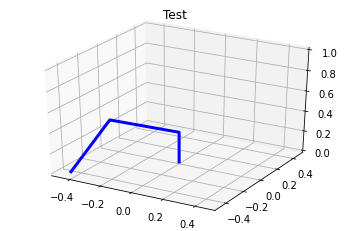

In [ ]:
ax = plt.axes(projection='3d')
links_length = np.array([0.3, 0.5, 0.5, 0, 0, 0])
joint_angles = [np.pi/3, np.pi/3, np.pi / 2, np.pi / 2, np.pi / 2, np.pi / 2]
PlotFK(joint_angles, links_length.tolist(), color="blue")
ax.set_title('Test')
plt.show()

#### Initial FK

In [ ]:
def PlotFK_1(q, links, color='b', linewidth=3):
    pos0 = [0, 0, 0]

    T = Tz(links[0])

    pos1 = T[0:3, 3]


    T = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Tx(links[1])])

    pos2 = T[0:3, 3]

    T = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Tz(links[2])])
    pos3 = T[0:3, 3]

    T = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Tx(-links[3])])


    pos4 = T[0:3, 3]

    T = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Tx(-links[3]),
                             Rx(q[3]),
                             Tz(links[4])])
    

    pos5 = T[0:3, 3]

    T = np.linalg.multi_dot([Tz(links[0]),
                             Rz(q[0]),
                             Tx(links[1]),
                             Ry(q[1]),
                             Tz(links[2]),
                             Ry(q[2]),
                             Tx(-links[3]),
                             Rx(q[3]),
                             Tz(links[4]),
                             Ry(q[4]),
                             Tz(links[5]), 
                             Rx(q[5])])


    pos6 = T[0:3, 3]
    # print(f"End-effector pos: {pos6}")

    x = [pos0[0], pos1[0], pos2[0], pos3[0], pos4[0], pos5[0], pos6[0]]
    y = [pos0[1], pos1[1], pos2[1], pos3[1], pos4[1], pos5[1], pos6[1]]
    z = [pos0[2], pos1[2], pos2[2], pos3[2], pos4[2], pos5[2], pos6[2]]

    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(0, 1)

    ax.plot3D(x, y, z, linewidth=linewidth, c=color)

#### Nullspace

In [ ]:
def NullSpace(q_current, r_global, links_length):
    i = 0
    error = [10, 10, 10, 10, 10, 10]

    while abs(sum(error[0:3])) > 0.01 or i < 2:
        values = tuple(q_current.tolist()+links_length.tolist())
        r_current = T_lambda(*values)
        r_current = np.hstack([r_current[0:3, 3], [0, 0, 0]])

        error = r_global - r_current
        # print(r_global, r_current)
        if i%200 == 0:
            print(f"[{i}] Error sum: {sum(error[0:3])}")
        d_error = error / 100

        jac = J_lambda(*values)
        jac_pinv = np.linalg.pinv(jac)

        H_init = GetH(jac)

        delta_q = 0.001

        q_dot_zero = None

        for j in range(len(jac[0])):
            v_cur = q_current.copy()
            v_cur[0] += delta_q
            values = tuple(v_cur.tolist()+links_length.tolist())
            jac_cur = J_lambda(*values)
            H_cur = GetH(jac_cur)

            q_dot_zero_cur = (H_cur - H_init) / delta_q

            if q_dot_zero is None:
                q_dot_zero = q_dot_zero_cur
            else:
                q_dot_zero = np.hstack([q_dot_zero, q_dot_zero_cur])

        term01 = np.dot(jac_pinv, jac)

        Im = np.ones((6, 6))
        term0 = Im - term01

        delta_q = np.dot(jac_pinv, d_error) + np.dot(term0, q_dot_zero)

        q_current = q_current + delta_q
        i += 1

        if i % 20 == 0:
            PlotFK(q_current.tolist(), links_length.tolist(), color="black", linewidth=0.2)

    return q_current

#### Code

[0] Error sum: -0.8187265134838477


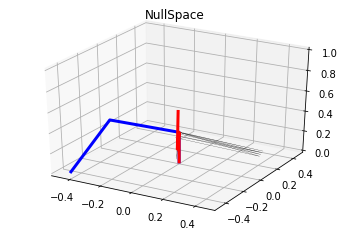

In [ ]:
ax = plt.axes(projection='3d')

# NullSpace
PlotFK(joint_angles, links_length.tolist(), color="blue")

r_global = np.array([-0.4, 0.4, 0.466, 0, 0, 0])
q_start = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

q_final = NullSpace(q_start, r_global, links_length)
PlotFK(q_final.tolist(), links_length.tolist(), 'r')

ax.set_title('NullSpace')
plt.show()

In [ ]:
def WeightedPseudoInv(q_current, weighs, links_length):
    i = 0
    error = [10, 10, 10, 10, 10, 10]

    while abs(sum(error[0:3])) > 0.01 or i < 2:
        values = tuple(q_current.tolist()+links_length.tolist())
        r_current = T_lambda(*values)
        r_current = np.hstack([r_current[0:3, 3], [0, 0, 0]])

        error = r_global - r_current
        # print(f"[{i}] Error sum: {round(sum(error[0:3]), 4)}")
        d_error = error / 100

        jac = J_lambda(*values)
        # print(jac.shape)

        J_wgh_1 = np.linalg.multi_dot([np.linalg.pinv(weighs), np.transpose(jac)])
        J_wgh_2 = np.linalg.multi_dot([jac, np.linalg.pinv(weighs), np.transpose(jac)])

        J_wgh = np.linalg.multi_dot([J_wgh_1, np.linalg.pinv(J_wgh_2)])

        delta_q = np.dot(J_wgh, d_error)
        # print(delta_q.shape)

        q_current = q_current + delta_q
        i += 1

        if i % 20 == 0:
            PlotFK(q_current.tolist(), links_length.tolist(), color="black", linewidth=0.2)

    return q_current

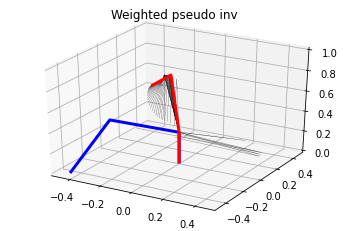

In [ ]:
ax = plt.axes(projection='3d')
# Weighted pseudo inv
PlotFK(joint_angles, links_length.tolist(), color="blue")

r_global = np.array([-0.4, 0.4, 0.466, 0, 0, 0])
q_start = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
weighs_pseudo_inv = np.diag([1, 1, 1, 1, 1, 1])

q_final = WeightedPseudoInv(q_start, weighs_pseudo_inv, links_length)
PlotFK(q_final.tolist(), links_length.tolist(), 'r')

ax.set_title('Weighted pseudo inv')
plt.show()

# Appendix

In [ ]:
# Tx.subs([(x, a), (y, 0), (z, 0)])@\
# return sp.Matrix([
#                   [sp.cos(theta), -sp.sin(theta), 0, a],
#                   [sp.sin(theta)*sp.cos(alpha), sp.cos(theta)*sp.cos(alpha), -sp.sin(alpha), -sp.sin(alpha)*d],
#                   [sp.sin(theta)*sp.sin(alpha), sp.cos(theta)*sp.sin(alpha), sp.cos(alpha), sp.cos(alpha)*d],
#                   [0, 0, 0, 1]
# ])

In [ ]:
# d = sp.Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# d

In [ ]:
# d[:2, :2]

In [ ]:
# tuple([1,2]+[2, 3])
# r_global = np.array([-0.4, 0.4, 0.466, 0, 0, 0])
# r_global.tolist()

In [ ]:
# 70E5